## Using Yelp Open Dataset

##### Currently, users' opinions about a particular restaurant on Yelp are heavily influenced by only a few aspects displayed on the business's yelp page. Here are just a few:

1. Number of reviews on the restaurant
2. The overall rating of the restaurant (out of 5 stars)
3. Photos
4. The top listed reviews picked by Yelp
5. Popular dishes

Despite Yelp's attempt to give users an overview of what the restaurant is like, it is still a very cumbersome job for users to browser through all these information and make an informed decision which yields a positive experience for the user overall.


This project is an attempt to increase overall user experience by analyzing all of a restaurant's reviews and summarizing the main topics in a form of unigram adjectives clouds describing each of the main topics. 

In [1]:
import pandas as pd, numpy as np

In [2]:
yelp_df = pd.read_pickle('yelp_df.pkl')

In [3]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 16 columns):
_id             192609 non-null object
address         192609 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192127 non-null object
city            192609 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     192609 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
text            192606 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 23.5+ MB


In [15]:
yelp_df.categories

0                                         Golf, Active Life
1                      Nail Salons, Beauty & Spas, Day Spas
2             Beauty & Spas, Nail Salons, Day Spas, Massage
3         Hair Salons, Hair Stylists, Barbers, Men's Hai...
4         Plumbing, Shopping, Local Services, Home Servi...
5         Shipping Centers, Couriers & Delivery Services...
6         Local Services, Professional Services, Compute...
7                                            Bakeries, Food
8                         Sushi Bars, Restaurants, Japanese
9         Hair Stylists, Beauty & Spas, Hair Salons, Men...
10        Restaurants, Breakfast & Brunch, Mexican, Taco...
11        Event Planning & Services, Photographers, Prof...
12                 Fitness & Instruction, Active Life, Yoga
13        Bars, Nightlife, Pubs, Barbers, Beauty & Spas,...
14        Specialty Food, Restaurants, Dim Sum, Imported...
15               Italian, Restaurants, Pizza, Chicken Wings
16                                     R

For this project, we are only interested in Yelp in the Restaurant Category

In [39]:
def restaurant(list_categories):
    if list_categories == '':
        return False
    if list_categories == None:
        return False
    if 'Restaurants' in list_categories or 'Restaurant' in list_categories:
        return True
    else:
        return False

In [40]:
yelp_df['is_this_a_restaurant'] = yelp_df['categories'].apply(restaurant)

In [46]:
# Let's filter where our data is only for restaurants
yelp_res = yelp_df[yelp_df['is_this_a_restaurant'] == True]

#### Pickle Checkpoint

yelp_res.to_pickle('yelp_restaurants')

In [2]:
import pandas as pd

In [3]:
yelp_res = pd.read_pickle('yelp_restaurants')

#### Let's start EDA and Preprocessing

In [6]:
yelp_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59387 entries, 8 to 192608
Data columns (total 17 columns):
_id                     59387 non-null object
address                 59387 non-null object
attributes              57176 non-null object
business_id             59387 non-null object
categories              59387 non-null object
city                    59387 non-null object
hours                   45391 non-null object
is_open                 59387 non-null int64
latitude                59387 non-null float64
longitude               59387 non-null float64
name                    59387 non-null object
postal_code             59387 non-null object
review_count            59387 non-null int64
stars                   59387 non-null float64
state                   59387 non-null object
text                    59387 non-null object
is_this_a_restaurant    59387 non-null bool
dtypes: bool(1), float64(3), int64(2), object(11)
memory usage: 7.8+ MB


In [66]:
yelp_drop_text = yelp_res.drop('text', 1)

In [67]:
# Turn the dataframe into 
yelp_drop_text.to_csv('yelp_res_no_test.csv')

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

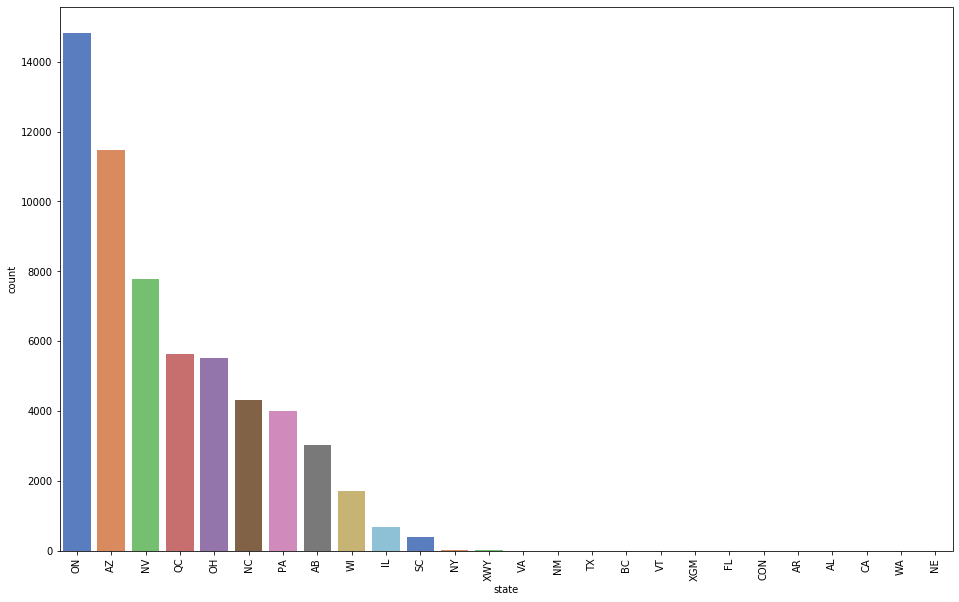

In [48]:
plt.figure(figsize = (16,10))
sns.countplot('state', data = yelp_drop_text, palette = 'muted', 
                  order = yelp_drop_text['state'].value_counts().index)
plt.xticks(rotation=90);

Looks like majority of the restaurants are located in Ontaria, Arizona, and Nevada

For the scope of this project, let's focus on one region such as Las Vegas only.

In [49]:
yelp_res_NV = yelp_res[yelp_res['state'] == 'NV']

In [56]:
sub_yelp_NV = yelp_res_NV.drop(['business_id', '_id', 'hours', 
                                'is_open', 'state', 'is_this_a_restaurant',
                                'attributes', 'city', 'postal_code'], 1)

#### Pickle Checkpoint

In [57]:
sub_yelp_NV.to_pickle('yelp_res_NV.pkl')

In [61]:
import pandas as pd
yelp_NV = pd.read_pickle('yelp_res_NV.pkl')

In [65]:
yelp_NV_notext = yelp_NV.drop('text', 1)
yelp_NV_notext.to_csv('yelp_NV_notext.csv')

#### Let's create a category feature so we can use this information to filter our df with

In [7]:
food_cat_string = '''Afghan
African
Senegalese
South African
American (New)
American (Traditional)
Arabian
Argentine
Armenian
Asian Fusion
Australian
Austrian
Bangladeshi
Barbeque
Basque
Belgian
Brasseries
Brazilian
Breakfast & Brunch
British
Buffets
Burgers
Burmese
Cafes
Themed Cafes
Cafeteria
Cajun/Creole
Cambodian
Caribbean
Dominican
Haitian
Puerto Rican
Trinidadian
Catalan
Cheesesteaks
Chicken Shop
Chicken Wings
Chinese
Cantonese
Dim Sum
Hainan
Shanghainese
Szechuan
Comfort Food
Creperies
Cuban
Czech
Delis
Diners
Dinner Theater
Ethiopian
Fast Food
Filipino
Fish & Chips
Fondue
Food Court
Food Stands
French
Mauritius
Reunion
Game Meat
Gastropubs
German
Gluten-Free
Greek
Guamanian
Halal
Hawaiian
Himalayan/Nepalese
Honduran
Hong Kong Style Cafe
Hot Dogs
Hot Pot
Hungarian
Iberian
Indian
Indonesian
Irish
Italian
Calabrian
Sardinian
Sicilian
Tuscan
Japanese
Conveyor Belt Sushi
Izakaya
Japanese Curry
Ramen
Teppanyaki
Kebab
Korean
Kosher
Laotian
Latin American
Colombian
Salvadoran
Venezuelan
Live/Raw Food
Malaysian
Mediterranean
Falafel
Mexican
Tacos
Middle Eastern
Egyptian
Lebanese
Modern European
Mongolian
Moroccan
New Mexican Cuisine
Nicaraguan
Noodles
Pakistani
Pan Asia
Persian/Iranian
Peruvian
Pizza
Polish
Polynesian
Pop-Up Restaurants
Portuguese
Poutineries
Russian
Salad
Sandwiches
Scandinavian
Scottish
Seafood
Singaporean
Slovakian
Soul Food
Soup
Southern
Spanish
Sri Lankan
Steakhouses
Supper Clubs
Sushi Bars
Syrian
Taiwanese
Tapas Bars
Tapas/Small Plates
Tex-Mex
Thai
Turkish
Ukrainian
Uzbek
Vegan
Vegetarian
Vietnamese
Waffles
Wraps
Shopping
Adult
Antiques
Art Galleries
Arts & Crafts
Art Supplies
Cards & Stationery
Cooking Classes
Costumes
Embroidery & Crochet
Fabric Stores
Framing
Paint-Your-Own Pottery
Auction Houses
Baby Gear & Furniture
Battery Stores
Bespoke Clothing
Books, Mags, Music & Video
Bookstores
Comic Books
Music & DVDs
Newspapers & Magazines
Video Game Stores
Videos & Video Game Rental
Vinyl Records
Brewing Supplies
Bridal
Cannabis Dispensaries
Computers
Cosmetics & Beauty Supply
Customized Merchandise
Department Stores
Discount Storeurg
Drones
Drugstores
Duty-Free Shops
Electronics
Eyewear & Opticians
Sunglasses
Farming Equipment
Fashion
Accessories
Ceremonial Clothing
Children’s Clothing
Clothing Rental
Department Stores
Formal Wear
Fur Clothing
Hats
Leather Goods
Lingerie
Maternity Wear
Men’s Clothing
Plus Size Fashion
Shoe Stores
Sports Wear
Dance Wear
Surf Shop
Swimwear
Traditional Clothing
Used, Vintage & Consignment
Women’s Clothing
Fireworks
Fitness/Exercise Equipment
Flea Markets
Flowers & Gifts
Cards & Stationery
Florists
Gift Shops
Gemstones & Minerals
Gold Buyers
Guns & Ammo
Head Shops
High Fidelity Audio Equipment
Hobby Shops
Home & Garden
Appliances
Candle Stores
Christmas Trees
Furniture Stores
Grilling Equipment
Hardware Stores
Holiday Decorations
Home Decor
Hot Tub & Pool
Kitchen & Bath
Kitchen Supplies
Lighting Stores
Mattresses
Nurseries & Gardening
Hydroponics
Outdoor Furniture Stores
Paint Stores
Playsets
Pumpkin Patches
Rugs
Tableware
Horse Equipment Shops
Jewelry
Knitting Supplies
Livestock Feed & Supply
Luggage
Medical Supplies
Military Surplus
Mobile Phone Accessories
Mobile Phones
Motorcycle Gear
Musical Instruments & Teachers
Office Equipment
Outlet Stores
Packing Supplies
Pawn Shops
Perfume
Personal Shopping
Photography Stores & Services
Pool & Billiards
Pop-up Shops
Props
Public Markets
Religious Items
Safe Stores
Safety Equipment
Shopping Centers
Souvenir Shops
Spiritual Shop
Sporting Goods
Bikes
Dive Shops
Golf Equipment
Hockey Equipment
Hunting & Fishing Supplies
Outdoor Gear
Skate Shops
Ski & Snowboard Shops
Sports Wear
Dance Wear
Tabletop Games
Teacher Supplies
Thrift Stores
Tobacco Shops
Toy Stores
Trophy Shops
Uniforms
Used Bookstore
Vape Shops
Vitamins & Supplements
Watches
Wholesale Stores
Wigs'''

In [8]:
food_cat_split = food_cat_string.split(', ')

In [9]:
food_cat_replace = [x.split('\n') for x in food_cat_split]

In [10]:
category_list = []
for n in food_cat_replace:
    for n in n:
        category_list.append(n)

In [11]:
category_list;

Let's add each category of food to be one of our features in the dataframe

In [12]:
working_yelp_res = yelp_res[['categories', 'city','name','state', 'text']]

In [13]:
working_yelp_res_cat = working_yelp_res.copy()
for cat in category_list:
    working_yelp_res_cat[cat] = 0

In [14]:
working_yelp_res_cat.shape

(59387, 305)

In [17]:
len(working_yelp_res_cat)

59387

In [18]:
working_yelp_res_cat.reset_index(drop = True, inplace = True)

In [35]:
yelp_all = working_yelp_res_cat.copy()
for index in range(yelp_all.shape[0]):
    for cat in category_list:
        if cat in [x for x in yelp_all.loc[index,'categories'].split(', ')]:
            yelp_all.loc[index,cat] = 1

#### Pickle Checkpoint

In [37]:
yelp_all.to_pickle('yelp_restaurants.pkl')

In [4]:
import pandas as pd
yelp_all = pd.read_pickle('yelp_restaurants.pkl')

In [5]:
yelp_all.shape

(59387, 306)

Let's find the top categories represented by the restaurants

In [6]:
yelp_all.describe().loc['mean'].sort_values(ascending = False).head(10).index

Index(['yelp_all_top20', 'Sandwiches', 'Fast Food', 'American (Traditional)',
       'Pizza', 'Burgers', 'Breakfast & Brunch', 'American (New)', 'Italian',
       'Mexican'],
      dtype='object')

In [52]:
food_cat = ['Sandwiches', 'Fast Food', 'American (Traditional)', 'Pizza', 'Burgers',
       'Breakfast & Brunch', 'American (New)', 'Italian', 'Mexican', 'Chinese',
       'Cafes', 'Japanese', 'Chicken Wings', 'Salad', 'Seafood', 'Sushi Bars',
       'Delis', 'Asian Fusion', 'Mediterranean', 'Barbeque']

In [53]:
yelp_all = yelp_all.copy()
yelp_all['yelp_all_top20'] = 0 

In [54]:
for index in range(yelp_all.shape[0]):
    for cat in [x for x in yelp_all.loc[index,'categories'].split(', ')]:
        if cat in food_cat:
            yelp_all.loc[index,'yelp_all_top20'] = 1

#### Pickle Checkpoint

In [68]:
yelp_all.to_pickle('yelp_restaurants.pkl')

In [69]:
city_list = ['Toronto', 'Las Vegas', 'Phoenix', 'Montréal', 'Calgary', 'Charlotte',
       'Pittsburgh']

In [70]:
yelp_all = yelp_all.copy()
yelp_all['major_city'] = 0
for index in range(yelp_all.shape[0]):
    if yelp_all.loc[index,'city'] in city_list:
        yelp_all.loc[index,'major_city'] = 1
    

In [74]:
yelp_major = yelp_all[yelp_all['major_city'] == 1]

In [75]:
yelp_major.shape

(30285, 307)

#### Pickle Checkpoint

In [76]:
yelp_major.to_pickle('yelp_df_top_cities.pkl')